In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('data/supermarket_3.pkl')
df.head()

,invoice_id,city,customer_type,gender,product_line,unit_price,total,date,time,payment,rating,quantity_boxcox,month,shift
0,750-67-8428,Yangon,Member,Female,Health and beauty,0.431869,0.850677,2019-01-05,13:08,Ewallet,0.700000,0.385456,January,Morning
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,-0.886596,-0.500473,2019-03-08,10:29,Cash,0.866667,0.000000,March,Morning
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,-0.197514,0.249843,2019-03-03,13:23,Credit card,0.133333,0.385456,March,Morning
3,123-19-1176,Yangon,Member,Male,Health and beauty,0.066356,0.677951,2019-01-27,20:33,Ewallet,0.466667,0.565951,January,Afternoon
4,373-73-7910,Yangon,Normal,Male,Sports and travel,0.689747,1.096858,2019-02-08,10:37,Ewallet,-0.566667,0.385456,February,Morning


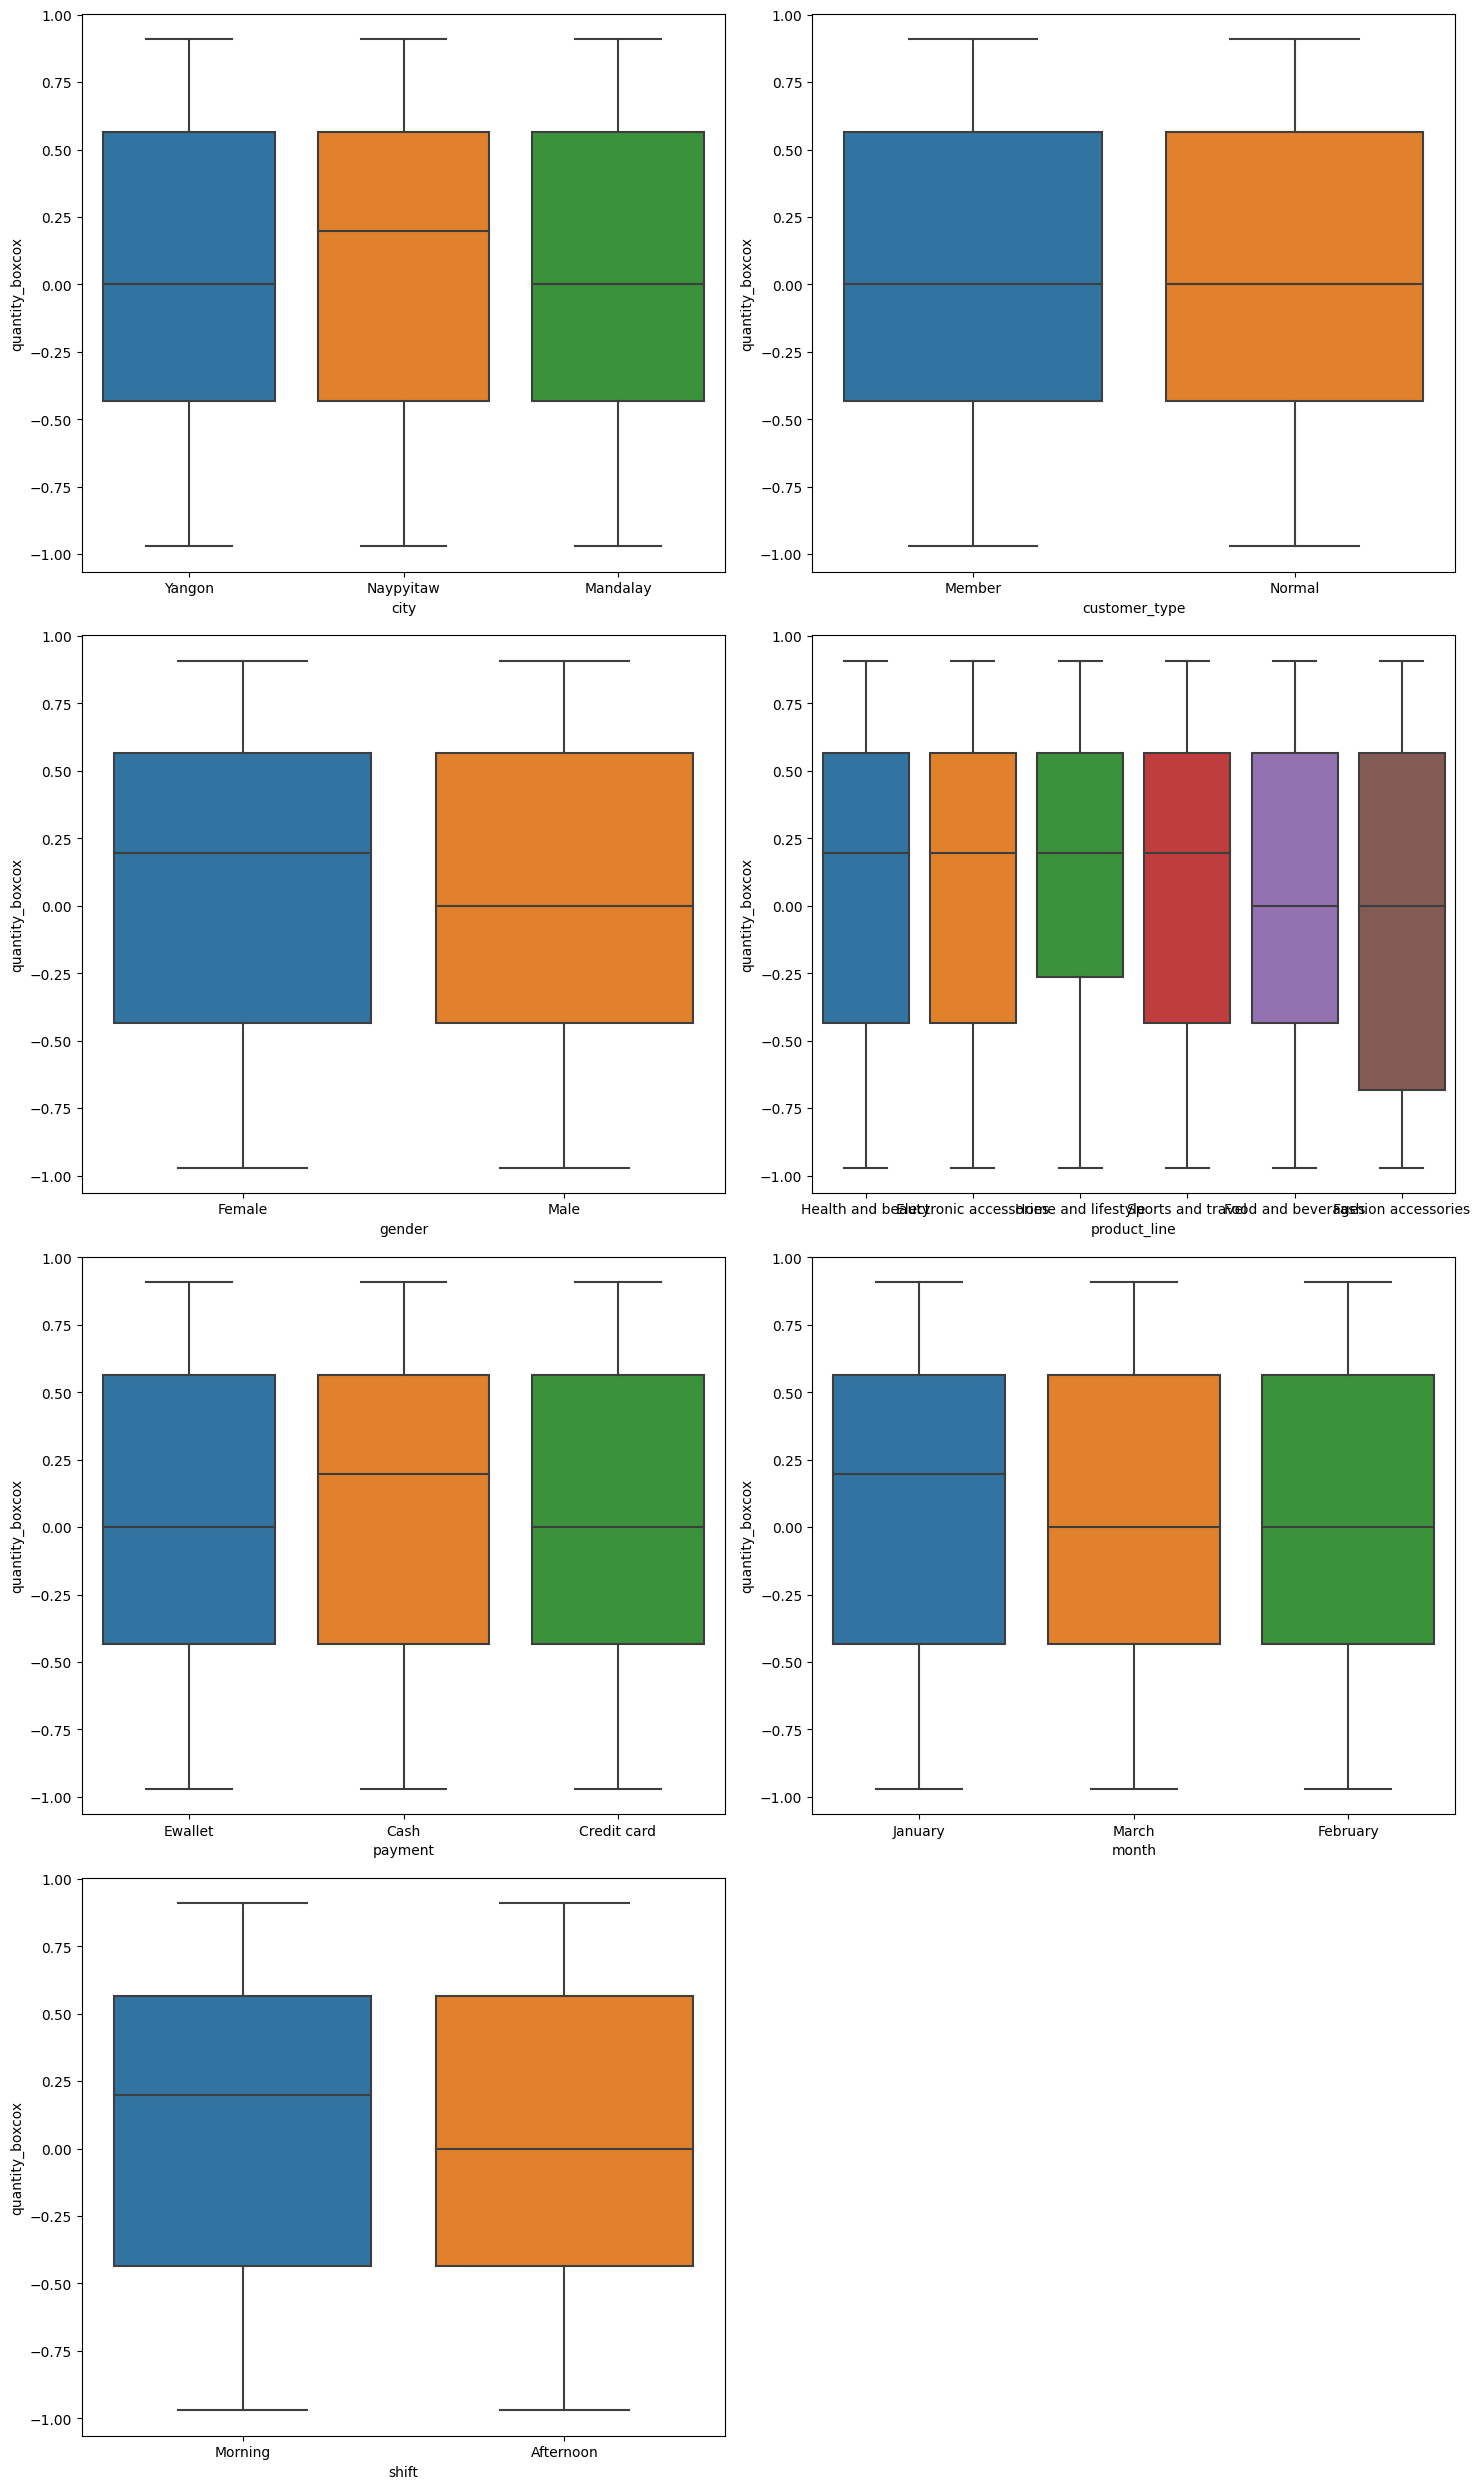

In [3]:
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
axes = axes.flat

lista_super = ['city', 'customer_type', 'gender', 'product_line', 'payment', 'month', 'shift']

for indice, elemento in enumerate(lista_super):
    sns.boxplot(x = elemento, y = 'quantity_boxcox', data = df, ax=axes[indice])

plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [4]:
# Todas nuestras categóricas tienen orden menos member.
# Para member utilizamos el método OneHotEncoder

oh = OneHotEncoder()
transformados = oh.fit_transform(df[['customer_type']])
oh_df = pd.DataFrame(transformados.toarray())

In [5]:
oh_df.columns = oh.get_feature_names_out()

In [6]:
df_oh = pd.concat([df,oh_df],axis=1)

In [7]:
def encoder_map(df, columna, orden_valores):
    # nos creamos un diccionario vacío para hacer el map después.
    ordinal_dict = {}
    # iteramos por nuestra lista de valores usando el enumerate que recordamos nos devolvía también el índice o posición de cada elemento
    for i, valor in enumerate(orden_valores):
        ordinal_dict[valor]=i+1 # le sumamos uno a la posición para no tener valores de 0.
    columna_nueva =columna + "map_funcion"
    # aplicamos el map
    df[columna_nueva] = df[columna].map(ordinal_dict)
    return df

In [8]:
df_oh = encoder_map(df_oh, "gender", ["Male","Female"])

In [9]:
df_oh = encoder_map(df_oh, "shift", ["Afternoon", "Morning"])

In [10]:
df_oh.sample(10)

,invoice_id,city,customer_type,gender,product_line,unit_price,total,date,time,payment,rating,quantity_boxcox,month,shift,customer_type_Member,customer_type_Normal,gendermap_funcion,shiftmap_funcion
638,364-33-8584,Mandalay,Member,Female,Food and beverages,-0.834443,-0.464911,2019-03-08,15:27,Cash,0.500000,0.000000,March,Afternoon,1.0,0.0,2,1
334,835-16-0096,Naypyitaw,Member,Male,Sports and travel,-0.899467,-0.509250,2019-03-24,13:48,Ewallet,0.500000,0.000000,March,Morning,1.0,0.0,1,2
923,887-42-0517,Naypyitaw,Normal,Female,Sports and travel,0.619396,1.029698,2019-01-10,10:31,Credit card,-0.133333,0.385456,January,Morning,0.0,1.0,2,2
977,518-71-6847,Mandalay,Member,Male,Food and beverages,-0.635375,-0.248663,2019-02-26,15:10,Ewallet,-0.700000,0.197367,February,Afternoon,1.0,0.0,1,1
372,730-70-9830,Naypyitaw,Normal,Female,Home and lifestyle,0.330226,0.541453,2019-03-14,17:54,Ewallet,-0.600000,0.197367,March,Afternoon,0.0,1.0,2,1
495,632-32-4574,Mandalay,Normal,Male,Sports and travel,0.459166,1.106512,2019-03-20,14:14,Cash,-0.500000,0.565951,March,Morning,0.0,1.0,1,2
267,571-94-0759,Mandalay,Member,Female,Food and beverages,0.429871,1.526115,2019-01-08,20:55,Cash,0.833333,0.908681,January,Afternoon,1.0,0.0,2,1
877,608-05-3804,Mandalay,Member,Male,Electronic accessories,-0.343542,-0.611397,2019-02-25,20:19,Cash,-0.300000,-0.970708,February,Afternoon,1.0,0.0,1,1
534,892-05-6689,Yangon,Normal,Female,Home and lifestyle,-0.597204,-0.303141,2019-03-11,13:28,Ewallet,-0.266667,0.000000,March,Morning,0.0,1.0,2,2
973,531-56-4728,Yangon,Normal,Male,Home and lifestyle,0.551487,-0.004600,2019-02-11,15:29,Cash,-0.533333,-0.434049,February,Afternoon,0.0,1.0,1,1


In [24]:
df_oh.sample(10)

,invoice_id,city,customer_type,gender,product_line,unit_price,total,date,time,payment,rating,quantity_boxcox,month,shift,gendermap_funcion,shiftmap_funcion,customer_type_Member,customer_type_Normal
594,585-11-6748,Mandalay,Member,Male,Sports and travel,0.922548,0.147212,2019-03-15,13:05,Cash,-0.566667,-0.434049,March,Morning,1,2,1.0,0.0
31,149-71-6266,Mandalay,Member,Male,Sports and travel,0.506880,1.394853,2019-01-28,12:43,Cash,-0.833333,0.740058,January,Morning,1,2,1.0,0.0
620,420-97-3340,Yangon,Normal,Female,Food and beverages,0.365069,-0.080870,2019-03-28,15:30,Credit card,0.733333,-0.434049,March,Afternoon,2,1,0.0,1.0
864,124-31-1458,Yangon,Member,Female,Electronic accessories,0.540613,-0.009049,2019-01-08,14:30,Cash,-0.133333,-0.434049,January,Morning,2,2,1.0,0.0
866,361-59-0574,Mandalay,Member,Male,Sports and travel,0.783400,1.460257,2019-03-15,14:48,Credit card,-0.166667,0.565951,March,Morning,1,2,1.0,0.0
987,552-44-5977,Mandalay,Member,Male,Health and beauty,0.150244,0.769474,2019-01-03,19:08,Credit card,-0.266667,0.565951,January,Afternoon,1,1,1.0,0.0
141,280-17-4359,Naypyitaw,Member,Male,Health and beauty,0.782734,2.007339,2019-01-25,13:48,Cash,0.366667,0.908681,January,Morning,1,2,1.0,0.0
208,573-58-9734,Mandalay,Normal,Female,Fashion accessories,-0.551709,-0.455952,2019-03-28,13:41,Ewallet,-0.633333,-0.434049,March,Morning,2,2,0.0,1.0
982,139-32-4183,Yangon,Member,Female,Sports and travel,0.937639,1.923564,2019-03-14,14:19,Ewallet,0.133333,0.740058,March,Morning,2,2,1.0,0.0
186,305-14-0245,Mandalay,Member,Female,Home and lifestyle,0.871283,1.556139,2019-03-03,19:00,Ewallet,0.166667,0.565951,March,Afternoon,2,1,1.0,0.0


In [30]:
df['city'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [31]:
df = encoder_map(df, "city", ['Yangon','Mandalay', 'Naypyitaw'])
df.sample(20)

,invoice_id,city,customer_type,gender,product_line,unit_price,total,date,time,payment,rating,quantity_boxcox,month,shift,citymap_funcion
972,452-04-8808,Mandalay,Normal,Male,Electronic accessories,0.706835,1.113171,2019-01-26,15:17,Cash,-0.500000,0.385456,January,Afternoon,2
223,279-62-1445,Naypyitaw,Member,Female,Fashion accessories,-0.947403,-0.693749,2019-02-21,12:38,Cash,0.400000,-0.970708,February,Morning,3
366,122-61-9553,Naypyitaw,Normal,Female,Electronic accessories,-0.086773,0.666208,2019-03-14,19:33,Cash,-0.466667,0.740058,March,Afternoon,3
429,325-77-6186,Yangon,Member,Female,Home and lifestyle,0.786063,2.011879,2019-03-08,10:53,Ewallet,0.100000,0.908681,March,Morning,1
22,273-16-6619,Mandalay,Normal,Male,Home and lifestyle,-0.488904,-0.530739,2019-03-15,12:20,Credit card,-0.866667,-0.682101,March,Morning,2
98,865-92-6136,Yangon,Normal,Male,Food and beverages,-0.055038,-0.252748,2019-03-23,10:16,Ewallet,0.766667,-0.434049,March,Morning,1
878,448-61-3783,Yangon,Normal,Female,Electronic accessories,0.772082,1.447909,2019-03-21,16:08,Credit card,-0.833333,0.565951,March,Afternoon,1
807,257-60-7754,Yangon,Normal,Female,Electronic accessories,-0.110963,-0.123605,2019-01-08,17:12,Cash,0.666667,-0.209137,January,Afternoon,1
335,527-09-6272,Yangon,Member,Female,Electronic accessories,-0.594319,-0.301174,2019-03-21,10:17,Credit card,0.700000,0.000000,March,Morning,1
337,692-27-8933,Mandalay,Normal,Female,Sports and travel,0.060364,0.320634,2019-02-24,13:02,Cash,-0.600000,0.197367,February,Morning,2


In [36]:
orden = ['Yangon','Mandalay', 'Naypyitaw']

In [37]:
def ordinal_encoder1(df, columna, orden_valores):
    # iniciamos el método y aplicamos la transformación a los datos.
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    # lo convertimos a dataframe
    oe_df = pd.DataFrame(transformados_oe)
    # cambiamos el nombre de la columna
    oe_df.columns = ordinal.feature_names_in_
    columna += "_oe"
    # sobre escribimos la columna con los valores de la tranformación
    df[columna] = oe_df
    return df

In [38]:
df = ordinal_encoder1(df, "city", orden)

In [40]:
df.sample(10)

,invoice_id,city,customer_type,gender,product_line,unit_price,total,date,time,payment,rating,quantity_boxcox,month,shift,citymap_funcion,city_oe
86,362-58-8315,Naypyitaw,Normal,Male,Fashion accessories,0.472481,0.426262,2019-03-25,10:23,Cash,0.966667,0.000000,March,Morning,3,2
347,725-96-3778,Naypyitaw,Member,Female,Home and lifestyle,0.754993,1.429265,2019-01-20,10:13,Cash,-0.766667,0.565951,January,Morning,3,2
292,278-97-7759,Yangon,Member,Female,Electronic accessories,0.160897,-0.542603,2019-02-18,20:29,Cash,-0.766667,-0.970708,February,Afternoon,1,0
760,842-40-8179,Mandalay,Member,Female,Food and beverages,0.487572,1.604806,2019-02-11,10:38,Credit card,-0.466667,0.908681,February,Morning,2,1
922,838-02-1821,Naypyitaw,Member,Female,Home and lifestyle,-0.943187,-0.654646,2019-02-22,12:10,Credit card,-0.600000,-0.682101,February,Morning,3,2
862,152-03-4217,Mandalay,Normal,Female,Home and lifestyle,-0.975366,-0.424446,2019-03-17,11:55,Credit card,-0.900000,0.740058,March,Morning,2,1
271,687-15-1097,Naypyitaw,Member,Female,Health and beauty,-0.756991,-0.603860,2019-01-03,19:17,Cash,0.900000,-0.682101,January,Afternoon,3,2
957,430-02-3888,Mandalay,Normal,Male,Electronic accessories,-0.204394,0.103993,2019-02-07,15:55,Cash,0.033333,0.197367,February,Afternoon,2,1
11,529-56-3974,Mandalay,Member,Male,Electronic accessories,-0.659565,-0.422872,2019-03-09,17:03,Cash,-0.066667,-0.209137,March,Afternoon,2,1
790,651-96-5970,Yangon,Normal,Male,Fashion accessories,-0.195739,-0.591240,2019-03-03,20:06,Credit card,-1.000000,-0.970708,March,Afternoon,1,0
